In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

In [ ]:
transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.ToTensor()
                                ,transforms.Normalize((0.5,),(0.5))])
main_data = datasets.MNIST('./data', train=True, download=True, transform=transform)
validation_data = datasets.MNIST('./data', train=False, download=True, transform=transform)
training_loader = torch.utils.data.DataLoader(main_data, batch_size=100, shuffle=True)
validation = torch.utils.data.DataLoader(main_data, batch_size=100, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:01<00:00, 5.47MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 160kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.51MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.44MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
def convert(con):
  image = con.clone().detach().numpy()
  image = np.transpose(image, (1, 2, 0))
  image = image.reshape((28, 28))
  image = image * (np.array(0.5,) + np.array(0.5,))
  image = image.clip(0, 1)
  return image

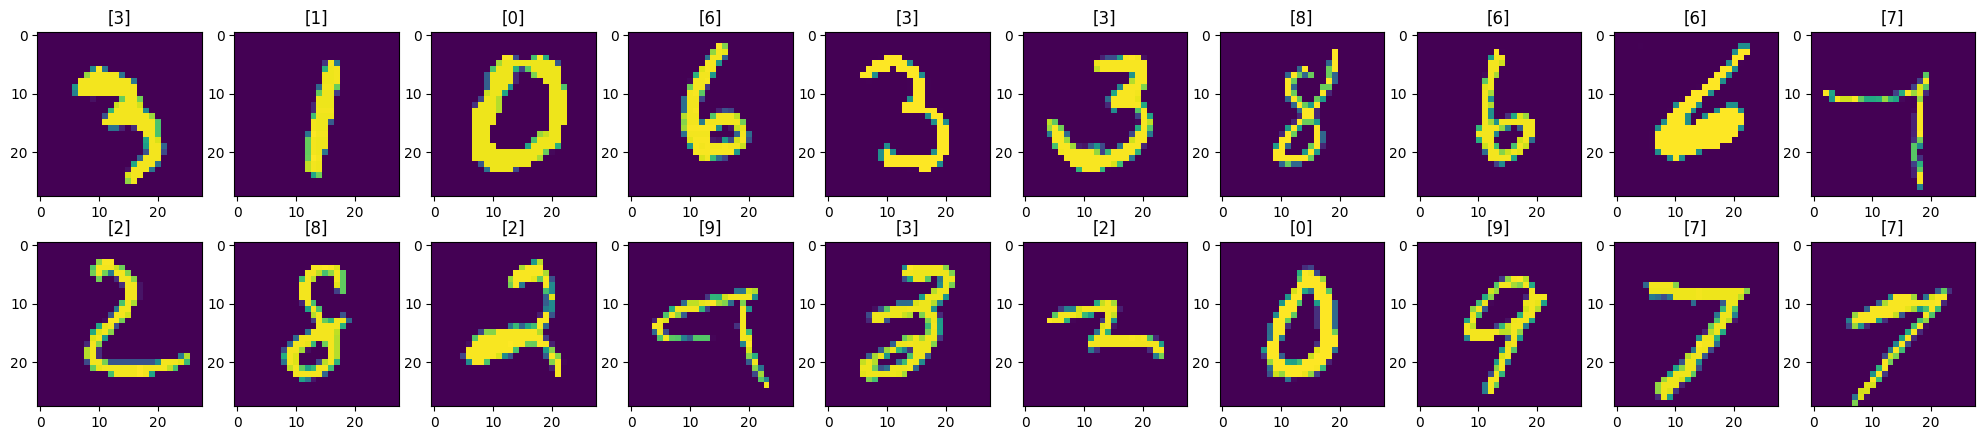

In [ ]:
iteration = iter(training_loader)
images, lable = next(iteration)
fig = plt.figure(figsize=(25, 5))

for i in np.arange(20):
  ax = fig.add_subplot(2, 10, i+1)
  plt.imshow(convert(images[i]))
  ax.set_title([lable[i].item()])

In [ ]:
class classifier(nn.Module):
  def __init__(self, d_input, H1, H2, d_output):
    super().__init__()
    self.linear1 = nn.Linear(d_input, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, d_output)
  def forward(self, x):
     x = F.relu(self.linear1(x))
     x = F.relu(self.linear2(x))
     x = F.log_softmax(self.linear3(x), dim=1)
     return x

In [ ]:
model = classifier(784, 125, 65, 10)
model

classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [ ]:
criteration = nn.CrossEntropyLoss()
optimization = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
epochs = 12
running_loss_history = []
running_accu_history = []
val_running_loss_history = []
val_running_accu_history = []

for e in range(epochs):
  running_loss = 0.0
  running_accu = 0.0
  val_running_loss = 0.0
  val_running_accu = 0.0
  for input, lable in training_loader:
    input = input.view(input.shape[0], -1)
    output = model(input)
    loss = criteration(output, lable)

    optimization.zero_grad()
    loss.backward()
    optimization.step()

    _,preds = torch.max(output, 1)
    running_loss+= loss.item()
    running_accu+= torch.sum(preds == lable.data).item()
  else:
    with torch.no_grad():
      for val_input, val_lable in validation:
        val_input = val_input.view(val_input.shape[0], -1)
        val_output = model(val_input)
        loss = criteration(val_output, val_lable)
        _,val_preds = torch.max(val_output, 1)
        val_running_loss+= loss.item()
        val_running_accu+= torch.sum(val_preds == val_lable.data).item()

      epoch_loss = running_loss / len(training_loader)
      epoch_accu = running_accu / len(training_loader.dataset)
      running_loss_history.append(epoch_loss)
      running_accu_history.append(epoch_accu)

      val_epoch_loss = val_running_loss / len(validation)
      val_epoch_accu = val_running_accu / len(validation.dataset)
      val_running_loss_history.append(val_epoch_loss)
      val_running_accu_history.append(val_epoch_accu)

      print('epoch: {})'.format(e+1))
      print('training loss: {:.4f}, ACC: {:.4f}'.format(epoch_loss, epoch_accu))
      print('validation loss: {:.4f}, ACC: {:.4f}'.format(val_epoch_loss, val_epoch_accu))

NameError: name 'training_loader' is not defined

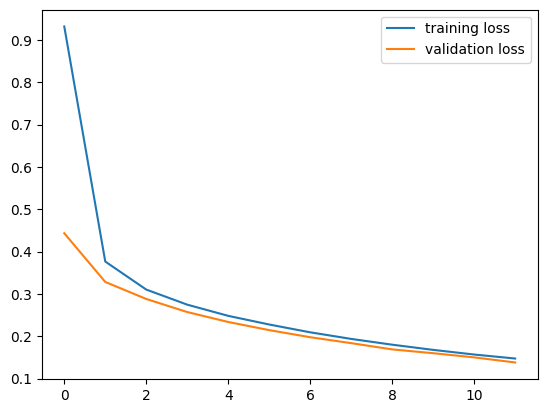

In [ ]:

plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()
plt.show()

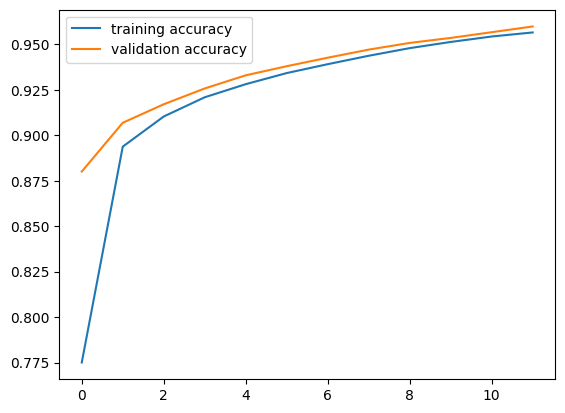

In [ ]:
plt.plot(running_accu_history, label = 'training accuracy')
plt.plot(val_running_accu_history, label = 'validation accuracy')
plt.legend()
plt.show()

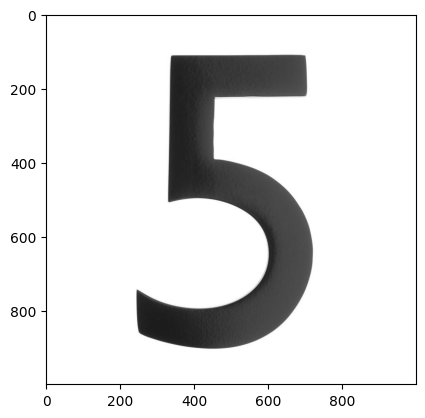

In [ ]:
import requests
from PIL import Image
url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img)

In [ ]:
import PIL.ImageOps

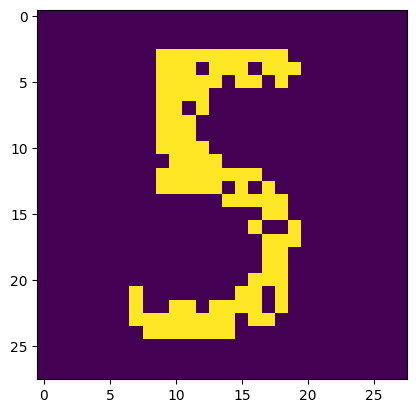

In [ ]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)
plt.imshow(convert(img))

In [ ]:
img = img.view(img.shape[0], -1)
output = model(img)
_,pred = torch.max(output, 1)
print(pred.item())

5


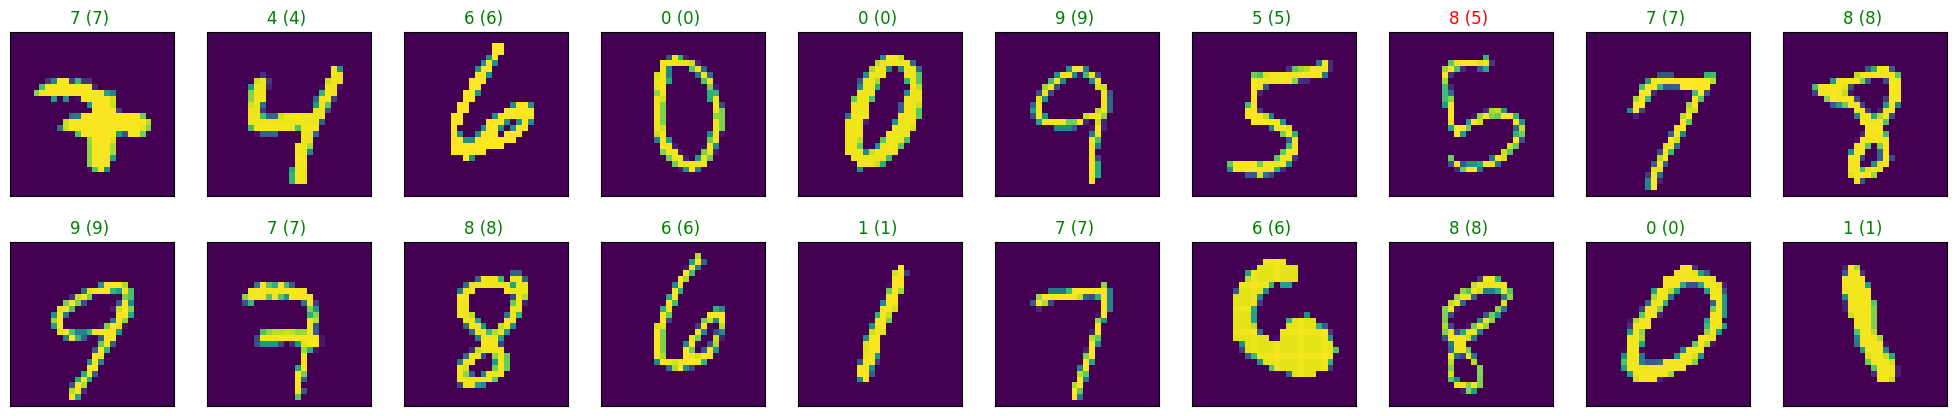

In [ ]:
iteration = iter(training_loader)
images, lable = next(iteration)
images_ = images.view(images.shape[0], -1)
output = model(images_)
_,pred = torch.max(output, 1)

fig = plt.figure(figsize=(25, 5))

for i in np.arange(20):
  ax = fig.add_subplot(2, 10, i+1, xticks=[], yticks=[])
  plt.imshow(convert(images[i]))
  ax.set_title("{} ({}) ".format(str(pred[i].item()), str(lable[i].item())), color= "green" if pred[i]==lable[i] else "red")